In [49]:
library(tidyverse)

df <- read_csv("wyniki.csv") %>%
  mutate(query_time = elapsed_ms/iterations)

In [50]:
tail(df)

method,api,iterations,elapsed_ms,query_time
<chr>,<chr>,<dbl>,<dbl>,<dbl>
add,Flask,7500,114286.1,15.23815
iris,Flask,7500,333610.7,44.48143
alive,RestRserve,7500,2787587.4,371.67832
iris,RestRserve,7500,3097881.7,413.05089
alive,Plumber,10000,188261.9,18.82619
add,Plumber,10000,189625.1,18.96251


In [51]:
glimpse(df)

Rows: 514
Columns: 5
$ method     <chr> "alive", "add", "iris", "alive", "add", "iris", "alive", "…
$ api        <chr> "Plumber", "Plumber", "Plumber", "Flask", "Flask", "Flask"…
$ iterations <dbl> 10, 10, 10, 10, 10, 10, 10, 10, 50, 50, 50, 50, 50, 50, 50…
$ elapsed_ms <dbl> 261.3277, 318.5618, 731.3666, 239.5844, 308.8908, 481.0987…
$ query_time <dbl> 26.13277, 31.85618, 73.13666, 23.95844, 30.88908, 48.10987…


In [52]:
count(df, api, iterations) %>% pivot_wider(names_from=api, values_from=n)

iterations,Flask,Plumber,RestRserve
<dbl>,<int>,<int>,<int>
10,15,15,10
50,15,15,10
100,15,15,10
250,15,15,10
500,15,15,10
750,15,15,10
1000,15,15,10
1500,15,15,10
2000,15,15,10


In [53]:
df %>%
    group_by(api, method) %>%
    summarise(mean_query = mean(query_time)) %>%
    ungroup() %>%
    pivot_wider(names_from = api, values_from = mean_query) %>%
    mutate(F_P = round(Plumber/Flask, 2), F_R = round(RestRserve/Flask, 2), R_P = round(RestRserve/Plumber, 2))

method,Flask,Plumber,RestRserve,F_P,F_R,R_P
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
add,17.69669,23.47744,NA,1.33,NA,NA
alive,17.49866,23.61810,373.2865,1.35,21.33,15.81
iris,48.77161,40.02200,415.1607,0.82,8.51,10.37


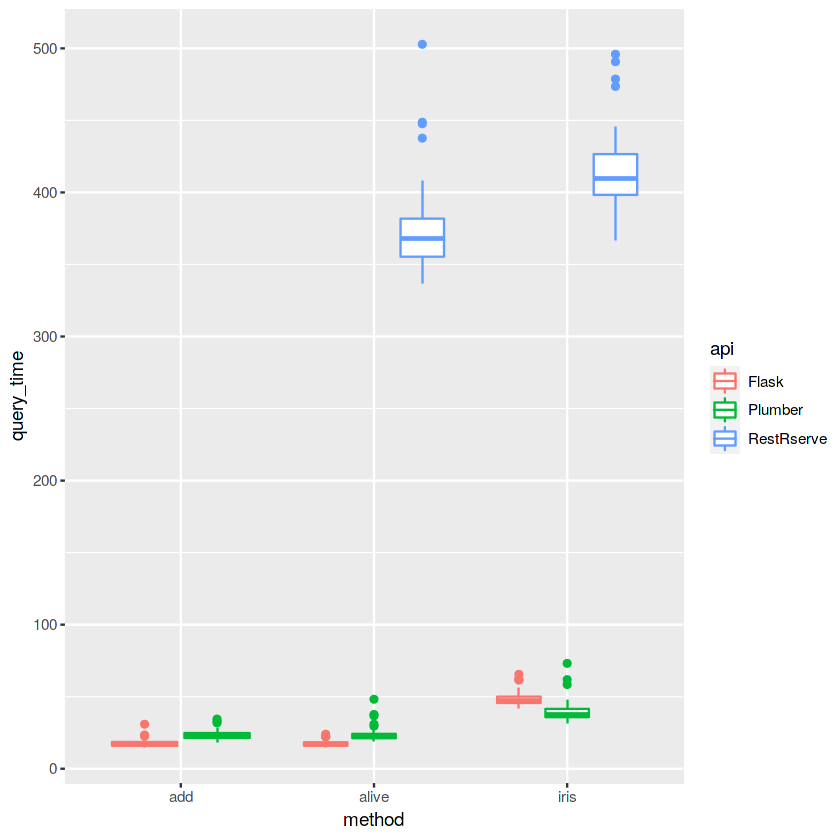

In [54]:
df %>%
    #filter(api != "RestRserve") %>%
    ggplot() +
    geom_boxplot(aes(method, query_time, color = api))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



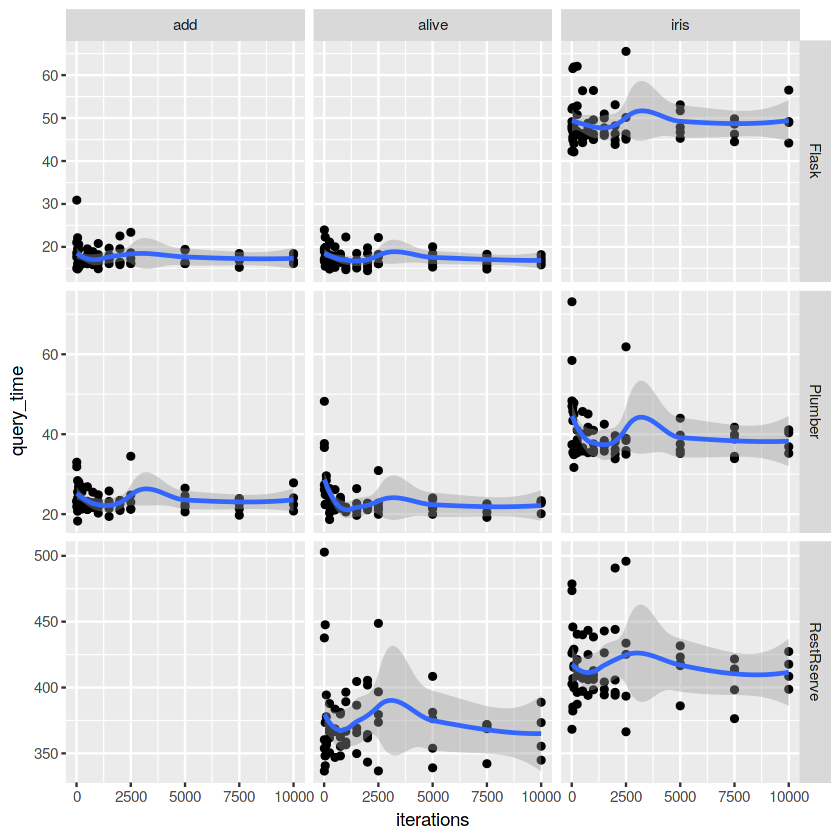

In [44]:
ggplot(df) +
  geom_point(aes(iterations, query_time)) +
  geom_smooth(aes(iterations, query_time)) +
  facet_grid(api~method, scales="free")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



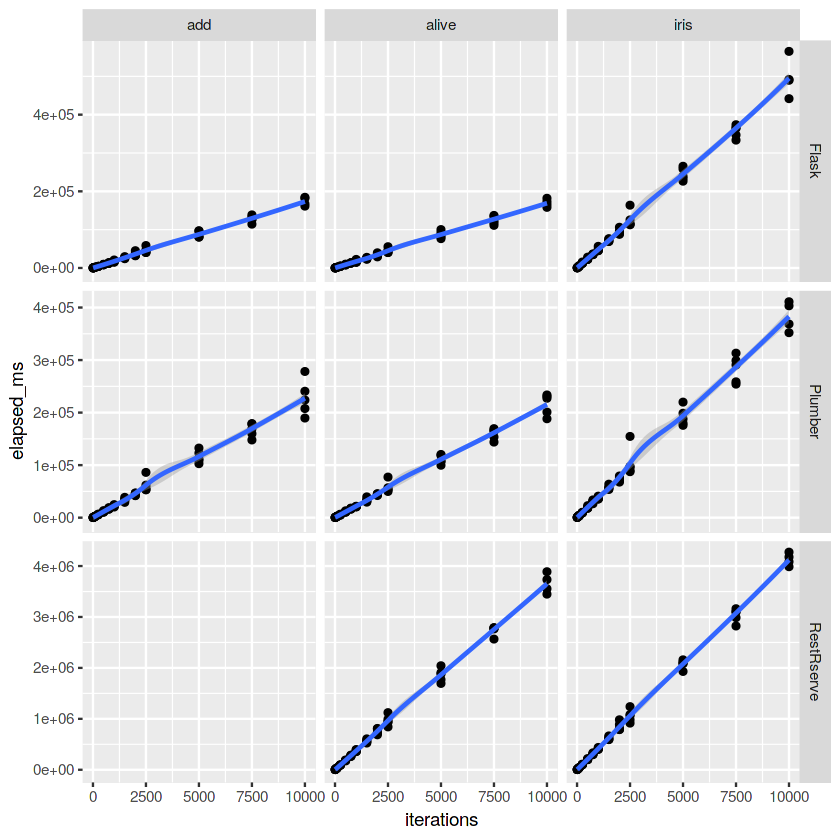

In [55]:
ggplot(df) +
  geom_point(aes(iterations, elapsed_ms)) +
  geom_smooth(aes(iterations, elapsed_ms)) +
  facet_grid(api~method, scales="free")

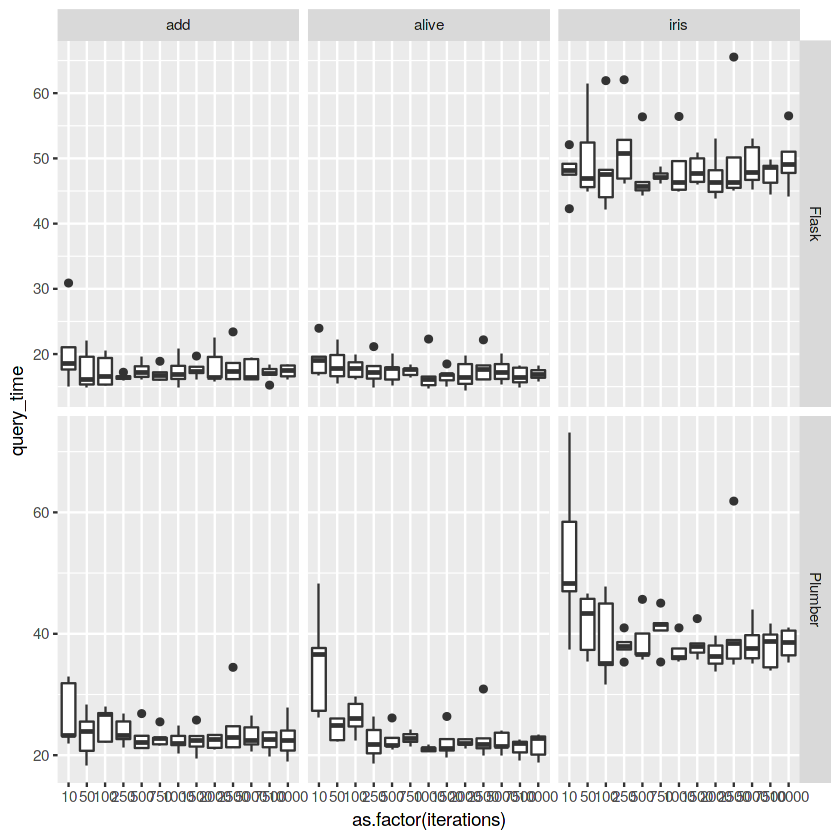

In [58]:
df %>%
    filter(api != "RestRserve") %>%
    ggplot() +
    geom_boxplot(aes(as.factor(iterations), query_time, group=iterations)) +
    facet_grid(api~method, scales="free")